In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [45]:
df = pd.read_csv("singindex_autonomous_data.csv", index_col=0)
metadf = pd.read_csv("singindex_autonomous_metadata.csv")

In [46]:
df.describe()

,Projected size of the global autonomous car market (USD billion),Estimated worldwide motor vehicle production (millions),CB insights- Amount of global funding deals dollars to auto tech startups (in million USD),CB insights - Number of global deals to auto tech startups,CB insights-Funding to autonomous vehicle tech startups (million USD),CB insights-Number of deals to autonomous tech startups,US electric vehcles sales 2011-2019,Projected sales of autonomous vehicles worldwide from 2019 to 2030 (million),Unit sales of social and entertainment robots worldwide from 2015 to 2025 (in millions),Unit cost of industrial robtot over time (USD),...,Fully autonomous car shipment forcast in the US (1000 units),Fully autonomous car shipment forecast in the world (1000 units),Estimated global installed based of cars with self-driving features (All levels) (millions car on the road) (visual estimate),Percentage of driver afraid to drive in fully autonomous vehicle,Number of accident reported in autonomous vehicle over years,LIDAR sensor technology prices over years (USD logarithmic scale),Asia pacific automotive sensor volumn forecast (annual growth rate),worldwide annual supply of industrial robots (1000 units) 2016-2019 forcast,Global self driving minutes forecast (billions),Number of patent application of autonomous vehicles over years
count,5.000000,21.000000,4.000000,4.000000,4.000000,4.000000,9.000000,12.000000,11.000000,5.00000,...,8.000000,6.000000,5.000000,4.000000,4.000000,6.000000,12.000000,15.00000,11.000000,12.000000
mean,28.752000,76.619048,1873.500000,120.000000,1200.750000,44.500000,170090.555556,16.547500,3.437273,36903.00000,...,295.000000,1655.666667,3.400000,70.000000,2.500000,14800.000000,9.283333,200.40000,2162.090909,1608.000000
std,5.800213,13.850907,1743.186068,58.872744,1299.392775,27.282473,132441.020993,17.971246,1.240726,21767.47645,...,191.496363,2073.932175,4.007493,5.597619,1.290994,32093.500121,1.357694,105.94864,1733.381288,987.672471
min,23.330000,56.000000,474.000000,62.000000,167.000000,20.000000,17425.000000,1.400000,1.720000,10856.00000,...,64.000000,104.000000,0.200000,62.000000,1.000000,100.000000,6.400000,60.00000,87.000000,690.000000
25%,24.100000,65.000000,955.500000,82.250000,494.750000,23.000000,97507.000000,3.592500,2.540000,27074.00000,...,138.500000,287.250000,0.600000,68.750000,1.750000,156.250000,8.850000,117.00000,720.000000,743.000000
50%,27.260000,77.000000,1304.500000,110.500000,772.500000,40.500000,122438.000000,9.185000,3.130000,31776.00000,...,266.500000,818.000000,2.000000,71.500000,2.500000,275.000000,9.900000,166.00000,1852.000000,1280.000000
75%,31.850000,90.000000,2222.500000,148.250000,1478.500000,62.000000,199818.000000,23.125000,4.345000,46150.00000,...,447.500000,2146.750000,4.200000,72.750000,3.250000,6093.750000,10.150000,272.00000,3415.500000,2061.500000
max,37.220000,97.000000,4411.000000,197.000000,3091.000000,77.000000,405000.000000,58.000000,5.510000,68659.00000,...,569.000000,5494.000000,10.000000,75.000000,4.000000,80000.000000,10.500000,414.00000,5102.000000,3580.000000


## Pre-processing

### Build index components

In [47]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [48]:
df[index_comps].to_csv("singindex_autonomous_raw_components.csv")
df_index.to_csv("singindex_autonomous_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_autonomous_new_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [49]:
from scipy import interpolate

In [50]:
df_index

,Projected size of the global autonomous car market (USD billion),Estimated worldwide motor vehicle production (millions),CB insights- Amount of global funding deals dollars to auto tech startups (in million USD),CB insights - Number of global deals to auto tech startups,CB insights-Funding to autonomous vehicle tech startups (million USD),CB insights-Number of deals to autonomous tech startups,US electric vehcles sales 2011-2019,Projected sales of autonomous vehicles worldwide from 2019 to 2030 (million),Unit sales of social and entertainment robots worldwide from 2015 to 2025 (in millions),Unit cost of industrial robtot over time (USD),...,Fully autonomous car shipment forcast in the US (1000 units),Fully autonomous car shipment forecast in the world (1000 units),Estimated global installed based of cars with self-driving features (All levels) (millions car on the road) (visual estimate),Percentage of driver afraid to drive in fully autonomous vehicle,Number of accident reported in autonomous vehicle over years,LIDAR sensor technology prices over years (USD logarithmic scale),Asia pacific automotive sensor volumn forecast (annual growth rate),worldwide annual supply of industrial robots (1000 units) 2016-2019 forcast,Global self driving minutes forecast (billions),Number of patent application of autonomous vehicles over years
Year,,,,,,,,,,,,,,,,,,,,,
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,0.753247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,0.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,0.766234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,0.792208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# interpolation
df_interp_index = df_index.interpolate(method="spline", order=1)

<AxesSubplot:xlabel='Year'>

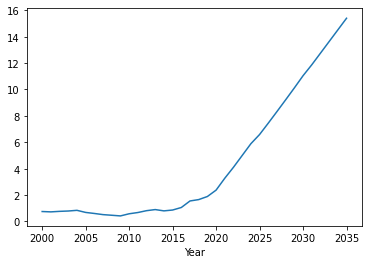

In [52]:
# build index
singindex_historic = df_interp_index.mean(axis=1, skipna=True)
singindex_historic.plot()

In [53]:
s_model = interpolate.interp1d(singindex_historic.index, singindex_historic.values, fill_value="extrapolate")

<AxesSubplot:>

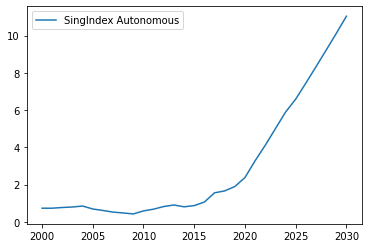

In [63]:
singindex = pd.DataFrame({"SingIndex Autonomous": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.bfill().plot()

In [64]:
singindex.bfill()

,SingIndex Autonomous
2000,0.727273
2001,0.727273
2002,0.766234
2003,0.792208
2004,0.844156
2005,0.685277
2006,0.606388
2007,0.518911
2008,0.470995
2009,0.420880


### Export

In [65]:
df_interp_index.to_csv("singindex_autonomous_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_autonomous_avg_interpolate.csv")
singindex.bfill().to_csv("singindex_autonomous_avg_extrapolate_2000_2030.csv")